<a href="https://colab.research.google.com/github/Davron030901/OpenCv/blob/main/37_Inpainting_to_Restore_Damaged_Photos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inpainting to Restore Damaged Photos**

**In this lesson we'll take a damaged old photo, and restore it using the inpaint() function**


In [ ]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

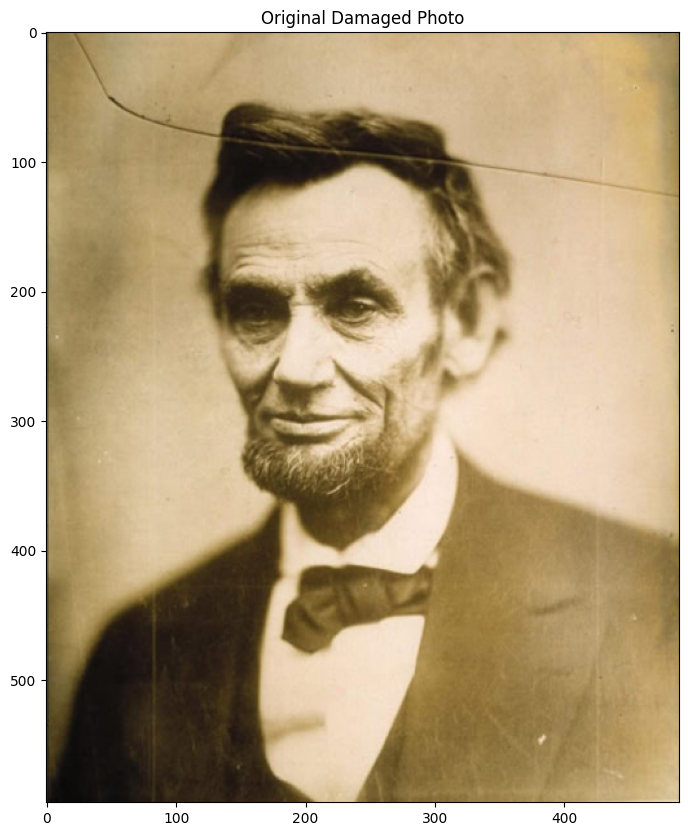

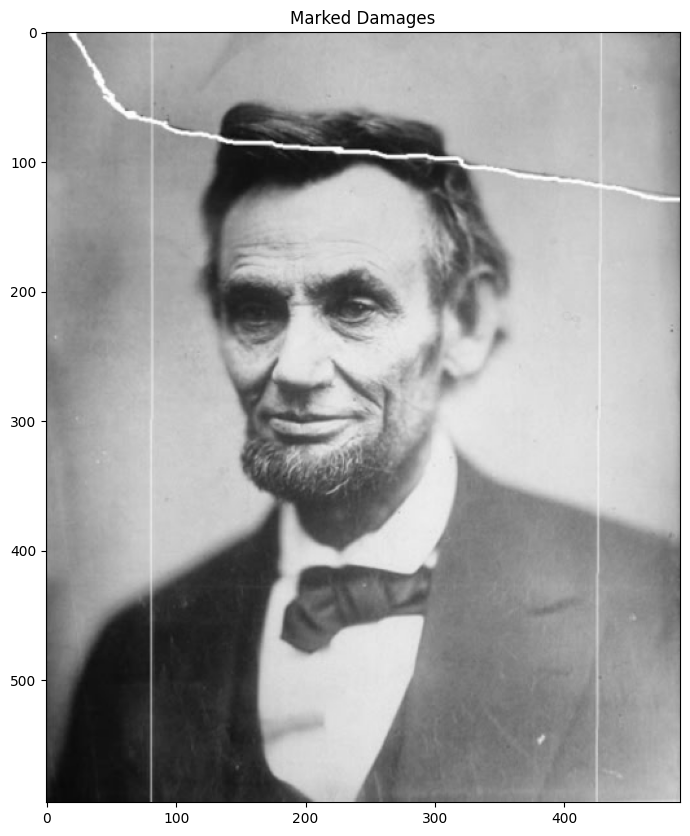

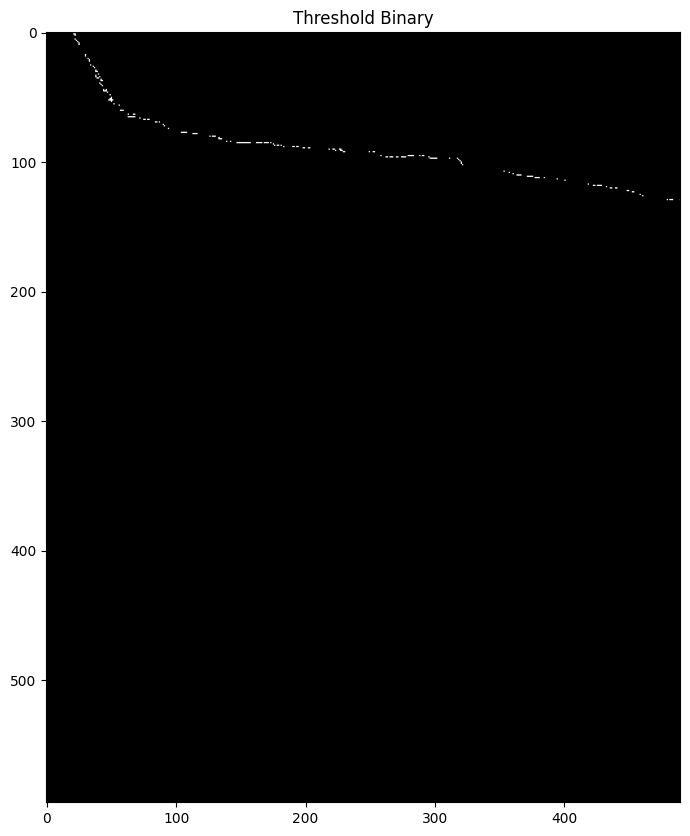

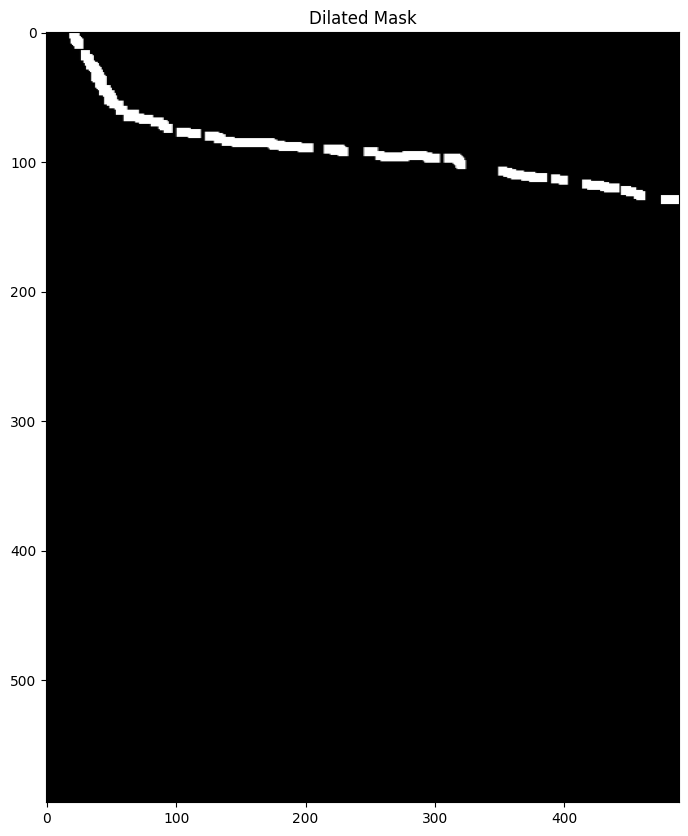

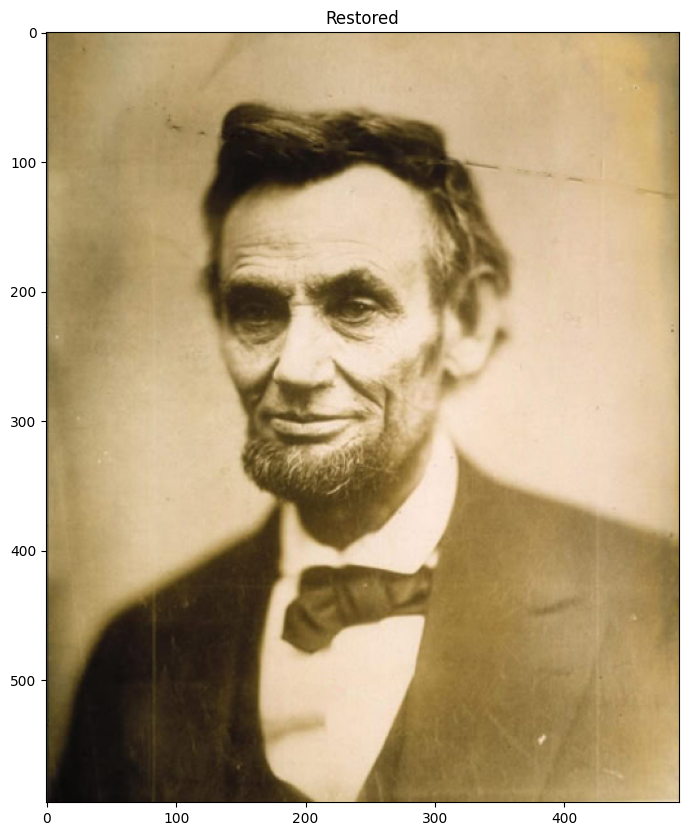

In [ ]:
# Load our damaged photo
image = cv2.imread('abraham.jpg')
imshow('Original Damaged Photo', image)

# Load the photo where we've marked the damaged areas
marked_damages = cv2.imread('mask.jpg', 0)
imshow('Marked Damages', marked_damages)

# Let's make a mask out of our marked image be changing all colors
# that are not white, to black
ret, thresh1 = cv2.threshold(marked_damages, 254, 255, cv2.THRESH_BINARY)
imshow('Threshold Binary', thresh1)


# Let's dilate (make thicker) our the marks w made
# since thresholding has narrowed it slightly
kernel = np.ones((7,7), np.uint8)

mask = cv2.dilate(thresh1, kernel, iterations = 1)
mask = cv2.resize(mask, image.shape[:2][::-1])
imshow('Dilated Mask', mask)
cv2.imwrite("abraham_mask.png", mask)

restored = cv2.inpaint(image, mask, 3, cv2.INPAINT_TELEA)
imshow('Restored', restored)